# Machine Learning: HW1 Code
## 2a: k-means algorithm

In [1]:
#Importing necessary modules/libraries
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
## STEP 1: Convert text file to vectors
with open('toydata.txt', 'r') as file:
    #lines = [line.rstrip() for line in file]
    lines = [line.strip() for line in file]

vectors = []

for i in range(len(lines)):
    for j in range(len(lines[i])):
        if lines[i][j] == ' ':
            coord1 = float(lines[i][:j])
            coord2 = float(lines[i][j:])
            vectors.append(np.array([coord1, coord2]))
            break
#vectors

Now, we'll look at the plot of the data before clustering:

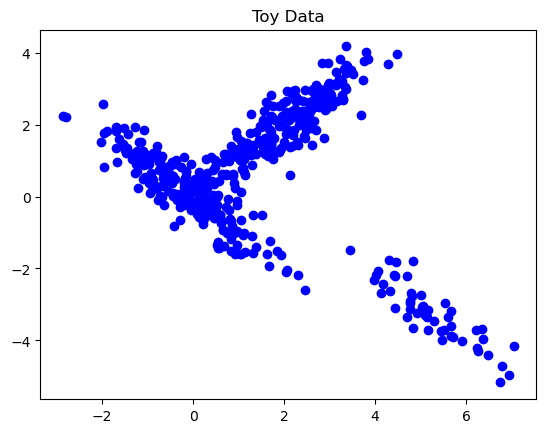

In [3]:
for i in range(len(vectors)):
    plt.scatter(vectors[i][0], vectors[i][1], color='b')
plt.title('Toy Data')
plt.show()

As we can see above, there are three distinct clusters that we'll use k-means and k-means++ to isolate.

In [4]:
## STEP 2: Distortion function
def get_gamma(m, x):
    """
    Returns the gamma vector based on centroid vector m and all points x
    Each gamma takes a value 0, 1, or 2
    """
    N = len(x)
    gamma = np.zeros((N), dtype=int)
    for i in range(N):
        distances = []
        min_dist_k = 0
        distances.append(np.linalg.norm(x[i] - m[0]))
        distances.append(np.linalg.norm(x[i] - m[1]))
        if distances[1] - distances[0] < 0:
            min_dist_k = 1
        distances.append(np.linalg.norm(x[i] - m[2]))
        if distances[2] - distances[1] < 0 and distances[2] - distances[0] < 0:
            min_dist_k = 2
        gamma[i] = min_dist_k

    return gamma

def get_C(x, gamma):
    """
    C is a list of lists where the outer index refers to which cluster and each list returns x in that cluster
    """
    N = len(gamma)
    C = []
    C_0 = []
    C_1 = []
    C_2 = []
    C.append(C_0)
    C.append(C_1)
    C.append(C_2)

    for i in range(N):
        a = gamma[i]
        C[a].append((x[i][0], x[i][1]))

    return C

def get_J(x, m, C, k):
    total = 0.0
    for i in range(k):
        cur_sum = 0.0
        for j in range(len(C[i])):
            diff = (C[i][j][0] - m[i][0], C[i][j][1] - m[i][1])
            sq_norm = np.linalg.norm(diff)**2
            cur_sum = cur_sum + sq_norm
        total = total + cur_sum
    return total        
        




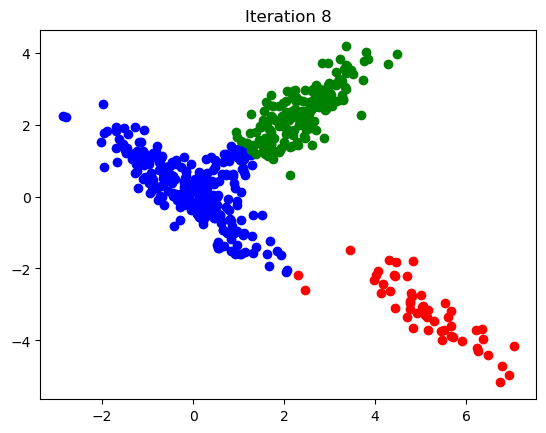

<Figure size 1000x1000 with 0 Axes>

In [5]:
# STEP 3: Initialization of k-means
x = vectors
N = len(x)
k = 3
#m is initially k random samples of our data
m = random.sample(x, k)
t = 1 #t will track how many iterations till convergence
J = [] # J will contain distortion values at each iteration
while True:
    #Generate gamma and C
    gamma = get_gamma(m, x)
    C = get_C(x, gamma)
    J.append(get_J(x, m, C, k))

    #Update centroid locations/use a temp variable to check if our centroids will change,
    #if not, then we stop iterating
    temp = m[:]
    for i in range(k):
        sum_x = 0.0
        sum_y = 0.0
        for j in range(len(C[i])):
            sum_x = sum_x + C[i][j][0]
            sum_y = sum_y + C[i][j][1]
        m[i] = (sum_x/len(C[i]), sum_y/len(C[i]))

    
    diff = 0.0
    for i in range(k):
        diff = diff + np.linalg.norm(temp[i][0] - m[i][0]) + np.linalg.norm(temp[i][1] - m[i][1])
    if diff < 1e-6:
        #Plot corresponding points
        for i in range(k):
            cur_points = C[i]
            colors = ['b', 'g', 'r']
            for j in range(len(cur_points)):
                plt.scatter(cur_points[j][0], cur_points[j][1], color=colors[i])
        plt.title(f"Iteration {t}")
        plt.figure(figsize=(10, 10))
        plt.show()
        
        break
    t = t + 1
    


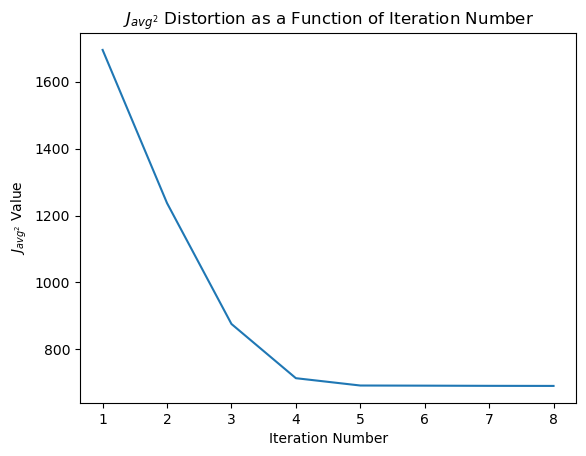

In [6]:
# STEP 4: Plot J values
fig, ax = plt.subplots()
ax.set_xlabel("Iteration Number")
ax.set_ylabel("$J_{avg^2}$ Value")
ax.set_title("$J_{avg^2}$ Distortion as a Function of Iteration Number")
x = np.linspace(1, t, t)

plt.plot(x, J)

## 2b: k-means++ algorithm